# WOFS: water-extents to water-summary

In [1]:
#130_-012 is A perfect cell: has no missing no orphan, no proximates, and all readable, as of 2016-01-21 beaware!
#130_-016 has 3 orphan tiles and 3-pairs of proxmimate
# [fxz547@raijin4 audit]$ cat orphan_extents_130_-016.txt
# orphaned tile: LS7_ETM_WATER_130_-016_2013-11-14T01-13-23.761270.tif
# orphaned tile: LS7_ETM_WATER_130_-016_2013-05-22T01-13-03.807003.tif
# orphaned tile: LS7_ETM_WATER_130_-016_2013-11-30T01-13-30.978320.tif
# move these 3 orphaned into a dir orphaned, so that they will not be used in water summary

#145_-017 cleaned orphand
EXTENT_DIR='/g/data/u46/wofs/extents/145_-017/'  

WATER_SUMMARY_FILE='/g/data/u46/wofs/water_zf2/summaries/waterSummary_130_-012.tiff' # A recent wofs test run results 2016-01

In [2]:
print EXTENT_DIR, WATER_SUMMARY_FILE

/g/data/u46/wofs/extents/145_-017/ /g/data/u46/wofs/water_zf2/summaries/waterSummary_130_-012.tiff


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import gdal
from gdalconst import *

import sys,os,time

def readtiff(geofile):
    #geofile=sys.argv[1]  # input geo file

    # Process timer start
    startTime = time.time()

    # Set the working directory
    #os.chdir(r'/data/soliver/data/LS5/scene01')
    #os.chdir(r'/opt/datas/fromNCI/LS5_TM_OTH_P51_GALPGS01-002_102_080_20100109/scene01')

    # Register drivers
    gdal.AllRegister()

    # Open image
    #ds = gdal.Open('L5102080_08020100109_B10.TIF', GA_ReadOnly)
    ds = gdal.Open(geofile, GA_ReadOnly)

    if ds is None:
        print 'Could not open image'
        sys.exit(1)

    # get image size
    rows = ds.RasterYSize
    cols = ds.RasterXSize
    numbands = ds.RasterCount

    print 'rows= %s, cols= %s, number of bands = %s' %(str(rows), str(cols), str(numbands))
    print ("********************")

    # # get projection and resolution info of the raster
    proj = ds.GetProjection()

    transform = ds.GetGeoTransform()
    xOrigin = transform[0]
    yOrigin = transform[3]
    pixelWidth = transform[1]
    pixelHeight = transform[5]

    print ("Projection Info = %s"%(proj))
    print ("xOrigin = %s,  yOrigin = %s "%(xOrigin, yOrigin))
    print ("pixelWidth = %s,  pixelHeight = %s "%(pixelWidth, pixelHeight))
    
    # Read the data and do the calculations  
    
    numarray=[]
    for i in range(1,numbands+1):
        band =ds.GetRasterBand(i)  # the very first band is i=1
        data = band.ReadAsArray(0,0,cols,rows) #.astype('float32')
        numarray.append(data)

    endTime = time.time()
    print 'The script took ' + str(endTime - startTime) + ' seconds'
    
    return numarray


#if __name__ == "__main__":
#    infile = sys.argv[1]
#    readtiff(infile)

rows= 4000, cols= 4000, number of bands = 2
********************
Projection Info = GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]
xOrigin = 130.0,  yOrigin = -11.0 
pixelWidth = 0.00025,  pixelHeight = -0.00025 
The script took 0.444771051407 seconds
water, clear, dry obs  45913796 1461348379 1415434583


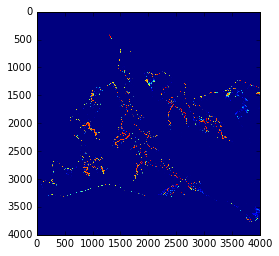

In [4]:
watersum=readtiff(WATER_SUMMARY_FILE)

waterobs = np.sum(watersum[0])
clearobs = np.sum(watersum[1])

print "water, clear, dry obs ",waterobs, clearobs , clearobs - waterobs

plt.imshow(watersum[0])#,cmap='Greys')

#130_-016 with orphaned extents water total:=46720681.0    and Dry Total: 9197329822.0


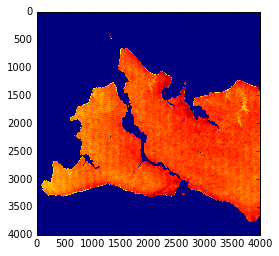

In [6]:
plt.imshow(watersum[1]) #,cmap='Greys')

In [19]:
WATER_SUMMARY_FILE2='/g/data/u46/wofs/water_zf2/summaries/debug_water_summary145_-017B.tiff' #produced by masked=False

In [20]:
watersum2=readtiff(WATER_SUMMARY_FILE2)

waterobs = np.sum(watersum2[0])
clearobs = np.sum(watersum2[1])

print "water, clear, dry obs ",waterobs, clearobs , clearobs - waterobs


rows= 4000, cols= 4000, number of bands = 2
********************
Projection Info = GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]
xOrigin = 145.0,  yOrigin = -16.0 
pixelWidth = 0.00025,  pixelHeight = -0.00025 
The script took 2.25328111649 seconds
water, clear, dry obs  28295227 1871605627 1843310400


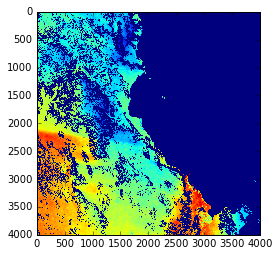

In [24]:
#plt.imshow(watersum2[1],cmap='Greys')
plt.imshow(watersum2[1])

In [23]:
np.where(watersum[0] != watersum2[0])

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
# test cell where no missing, orphan, proximate or non-readable tiles
# !ls -d /g/data/u46/wofs/extents/130_-012/

In [ ]:
# !gdalinfo /g/data/u46/wofs/water_zf2/summaries/waterSummary_130_-012.tiff

## To verify if the extents to water summary process is correct:

for some selected cells, compute the water_summary tif file according to extents files or a list of disovered tiles, be careful of
1) missing
2) orphaned?
3) proximate?

compare with wofs system produced resulted?

In [7]:
#del sys.modules['summarise_water_extents']  # force reload of the module after changes made
from summarise_water_extents import  SummarizeExtents


In [ ]:
myObj= SummarizeExtents(EXTENT_DIR)
wetdry=myObj.main()

plt.imshow(wetdry[1])

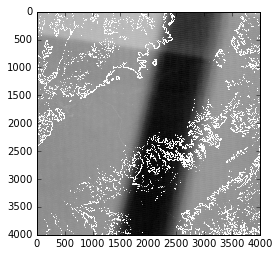

In [10]:
plt.imshow(wetdry[1]+ wetdry[0], cmap='Greys')

In [12]:
# compare wet obs with the band-1 in the water summary file 
np.where(wetdry[0] != watersum[0])

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
# compare wet + dry obs with the band-2 in water summary file 
np.where((wetdry[0] + wetdry[1]) != watersum[1])

In [13]:
watersum145_017= readtiff('/g/data/u46/wofs/water_zf2/summaries/waterSummary_145_-017.tiff')

rows= 4000, cols= 4000, number of bands = 2
********************
Projection Info = GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]
xOrigin = 145.0,  yOrigin = -16.0 
pixelWidth = 0.00025,  pixelHeight = -0.00025 
The script took 0.409038066864 seconds


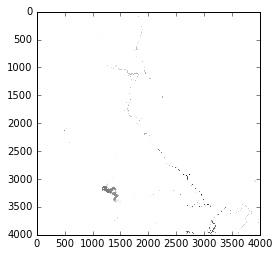

In [15]:
plt.imshow(watersum145_017[0], cmap='Greys')

28295227 6838192092 6809896865


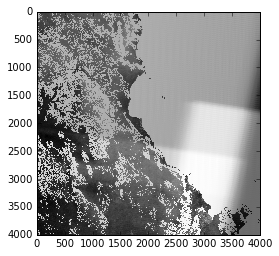

In [17]:
waterobs = np.sum(watersum145_017[0])
clearobs = np.sum(watersum145_017[1])
dryobs = clearobs - waterobs #should be

print waterobs, clearobs, dryobs
plt.imshow(watersum145_017[1], cmap='Greys')

# Check the Extent files in /g/data/u46/wofs/extents/130_-012

In [ ]:
water_extent=readtiff('/g/data/u46/wofs/extents/130_-012/LS5_TM_WATER_130_-012_2007-08-25T01-15-51.615044.tif')
plt.imshow(water_extent[0])

In [ ]:
raster = readtiff('/g/data/u46/wofs/extents/130_-012/LS5_TM_WATER_130_-012_2007-08-25T01-15-51.615044.tif')
# create output arrays for clear and water observation counts and summary
xsize=4000
ysize=4000
waterArray = np.zeros((ysize,xsize))
clearArray = np.zeros((ysize,xsize))
summaryArray = np.zeros((ysize,xsize))
print "Arrays setup."
clear = raster == 0
water = raster == 128
# waterArray[water] = waterArray[water] + 1
waterArray += water
clearArray += clear

# create summary from clear and water observations
clearArray += waterArray
summaryArray = (100.0 * waterArray) / clearArray
print "Arrays filled."

print clearArray
print waterArray

print np.sum(clearArray)
print np.sum(waterArray)

plt.imshow(waterArray, cmap="Greys")
#plt.imshow(clearArray)

#compare with  gdalinfo /g/data/u46/wofs/extents/130_-012/LS5_TM_WATER_130_-012_2007-08-25T01-15-51.615044.tif
####################################
#write arrays to GeoTiffs
#------------------------
def writegtiff():
    """write arrays to GeoTiffs"""
    outdriver = gdal.GetDriverByName("GTiff")
    clearout = outdriver.Create("ClearObs.tif", xsize, ysize, 1, gdal.GDT_Int16)
    waterout = outdriver.Create("WaterObs.tif", xsize, ysize, 1, gdal.GDT_Int16)
    summaryout = outdriver.Create("Summary.tif", xsize, ysize, 1, gdal.GDT_Float32)

    clearout.SetGeoTransform(trans)
    clearout.SetProjection(proj)
    clearout.GetRasterBand(1).WriteArray(clearArray)

    waterout.SetGeoTransform(trans)
    waterout.SetProjection(proj)
    waterout.GetRasterBand(1).WriteArray(waterArray)

    summaryout.SetGeoTransform(trans)
    summaryout.SetProjection(proj)
    summaryout.GetRasterBand(1).WriteArray(summaryArray)

    # close the files
    clearout = None
    waterout = None
    summaryout = None
    print "... Done!"
    
    

# Bits Operatoins

In [14]:
WATER_PRESENT         = 1 << 7 
print WATER_PRESENT

128


In [16]:
bitMask = 0x7F 
print bitMask

127


In [18]:
!ls /g/data/u46/wofs/extents/145_-017/*.tif | wc


    921     921   80017
